In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib. pylab as plt
from sklearn. model_selection import train_test_split

In [5]:
train = pd. read_csv("loan_sanction_train.csv")
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
train. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
duplicate = train. duplicated()
sum(duplicate)

0

In [10]:
 train. isna(). sum()
# More null values need to drop those null values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
df = train. dropna()

In [16]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [13]:
df. isna(). sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
df. var() == 0

C:\Users\debna\AppData\Local\Temp\ipykernel_2384\42165290.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df. var() == 0


ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
dtype: bool

In [17]:
df["Dependents"] = np. where(df["Dependents"] == "3+", "3", df["Dependents"])

C:\Users\debna\AppData\Local\Temp\ipykernel_2384\1085186670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Dependents"] = np. where(df["Dependents"] == "3+", "3", df["Dependents"])


In [18]:
from sklearn. preprocessing import LabelEncoder
lb = LabelEncoder()

df["Gender"] = lb. fit_transform(df["Gender"])
df["Married"] = lb. fit_transform(df["Married"])
df["Dependents"] = lb. fit_transform(df["Dependents"])
df["Education"] = lb. fit_transform(df["Education"])
df["Self_Employed"] = lb. fit_transform(df["Self_Employed"])
df["Property_Area"] = lb. fit_transform(df["Property_Area"])

C:\Users\debna\AppData\Local\Temp\ipykernel_2384\2209290626.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Gender"] = lb. fit_transform(df["Gender"])
C:\Users\debna\AppData\Local\Temp\ipykernel_2384\2209290626.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Married"] = lb. fit_transform(df["Married"])
C:\Users\debna\AppData\Local\Temp\ipykernel_2384\2209290626.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [19]:
df. head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,Y
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,Y


In [20]:
df = df. iloc[:,1:]
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,N
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,Y
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,Y
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,Y


In [21]:
df. describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.820833,0.647917,0.777083,0.202083,0.137500,5364.231250,1581.093583,144.735417,342.050000,0.854167,1.022917
std,0.383892,0.478118,1.020815,0.401973,0.344734,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.776411
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000,2.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,2.000000


In [22]:
df. Loan_Status. value_counts(normalize = True)
# so our data is Balanced data

Y    0.691667
N    0.308333
Name: Loan_Status, dtype: float64

Text(0, 0.5, 'Frequency')

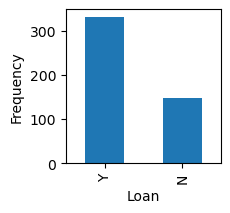

In [25]:
# Count of label
ax = df['Loan_Status'].value_counts().plot(kind='bar', figsize=(2,2))
ax.set_xlabel("Loan")
ax.set_ylabel("Frequency")

In [27]:
# Input and Output Split
predictors = df. loc[:, df.columns!="Loan_Status"]
type(predictors)

target = df["Loan_Status"]
type(target)

pandas.core.series.Series

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.2, random_state=0)

Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier as DT

In [30]:
model = DT(criterion = 'entropy')
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [31]:
#prediction on test data
test_pred = model. predict(x_test)

from sklearn. metrics import accuracy_score
print(accuracy_score(y_test, test_pred))
#np. mean(preds==y_test)
pd. crosstab(y_test, test_pred, rownames = ["Actual"], colnames = ["predictions"])

0.6666666666666666


predictions,N,Y
Actual,,
N,19,16
Y,16,45


In [32]:
# Prediction on Train Data
preds = model.predict(x_train)
pd.crosstab(y_train, preds, rownames = ['Actual'], colnames = ['Predictions'])

print(accuracy_score(y_train, preds))

1.0


Model is over fitting

In [33]:
# let us try random forest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=500, n_jobs=1, random_state=42)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, n_jobs=1, random_state=42)

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix(y_test, rf_clf.predict(x_test))
accuracy_score(y_test, rf_clf.predict(x_test))

0.7604166666666666

In [35]:
confusion_matrix(y_train, rf_clf.predict(x_train))
accuracy_score(y_train, rf_clf.predict(x_train))

1.0

This model also overfitting need to do Hyperparameter Tuning

In [36]:
# Creating new model testing with new parameters
forest_new = RandomForestClassifier(n_estimators=100,max_depth=10,min_samples_split=20,criterion='gini')  # n_estimators is the number of decision trees
forest_new.fit(x_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_split=20)

In [37]:
print('Train accuracy: {}'.format(forest_new.score(x_train, y_train)))
print('Test accuracy: {}'.format(forest_new.score(x_test, y_test)))

Train accuracy: 0.8541666666666666
Test accuracy: 0.75


In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=15)

In [51]:
pred = knn.predict(x_test)
pred

C:\Users\debna\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array(['Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [52]:
# Evaluate the model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred))
pd.crosstab(y_test, pred, rownames = ['Actual'], colnames= ['Predictions']) 

0.625


Predictions,N,Y
Actual,,
N,1,34
Y,2,59


In [53]:
# error on train data
pred_train = knn.predict(x_train)
print(accuracy_score(y_train, pred_train))
pd.crosstab(y_train, pred_train, rownames=['Actual'], colnames = ['Predictions']) 

0.71875


C:\Users\debna\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Predictions,N,Y
Actual,,
N,17,96
Y,12,259


In [54]:
from sklearn.svm import SVC

In [55]:
# kernel = linear
#help(SVC)
model_linear = SVC(kernel = "linear")
model_linear.fit(x_train, y_train)


SVC(kernel='linear')

In [57]:
pred_test_linear = model_linear.predict(x_test)
np.mean(pred_test_linear == y_test)

0.71875

In [58]:
pred_train_linear = model_linear. predict(x_train)
np.mean(pred_train_linear == y_train)

0.7994791666666666

In [60]:
# kernel = rbf
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(x_train, y_train)

SVC()

In [61]:
pred_test_rbf = model_rbf.predict(x_test)
np.mean(pred_test_rbf == y_test)

0.6354166666666666